In [1]:
! pip install -q "pillow==11.1.0" "requests==2.32.3" "torch==2.5.1" "torchvision==0.20.1" "transformers==4.48.0" "accelerate==1.2.1"


In [2]:
! pip install -q "numpy==1.26.4"

In [3]:
import numpy
import torch
from transformers import AutoModelForCausalLM, AutoProcessor
from PIL import Image
import requests

set _attn_implementation='eager' if you don't have flash_attn installed

In [4]:
model_id = "microsoft/Phi-3.5-vision-instruct"

model = AutoModelForCausalLM.from_pretrained(
  model_id,
  device_map="cuda",
  trust_remote_code=True,
  torch_dtype="auto",
  _attn_implementation='eager'
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [21]:
# for best performance, use num_crops=4 for multi-frame, num_crops=16 for single-frame.
processor = AutoProcessor.from_pretrained(model_id,
  trust_remote_code=True,
  num_crops=4
)

# Optical character recognition - single frame

Captcha

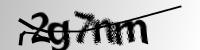

In [6]:
image = Image.open("/content/2g7nm.png")
images = [image]
placeholder = f"<|image_1|>\n"
image

In [7]:
messages = [
    {"role": "user", "content": placeholder+"Identify the captcha."},
]

prompt = processor.tokenizer.apply_chat_template(
  messages,
  tokenize=False,
  add_generation_prompt=True
)

In [8]:
inputs = processor(prompt, images, return_tensors="pt").to("cuda:0")

generation_args = {
    "max_new_tokens": 100,
    "temperature": 0.0,
    "do_sample": False,
}

generate_ids = model.generate(**inputs,
  eos_token_id=processor.tokenizer.eos_token_id,
  **generation_args
)

# remove input tokens
generate_ids = generate_ids[:, inputs['input_ids'].shape[1]:]
response = processor.batch_decode(generate_ids,
  skip_special_tokens=True,
  clean_up_tokenization_spaces=False)[0]

print(response)

/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
The `seen_tokens` attribute is deprecated and will be removed in v4.41. Use the `cache_position` model input instead.
`get_max_cache()` is deprecated for all Cache classes. Use `get_max_cache_shape()` instead. Calling `get_max_cache()` will raise error from v4.48


The image provided is not clear enough to identify as a CAPTCHA. CAPTCHAs are typically used to distinguish human users from bots and are not a subject of humor or memes.


Extract the signature

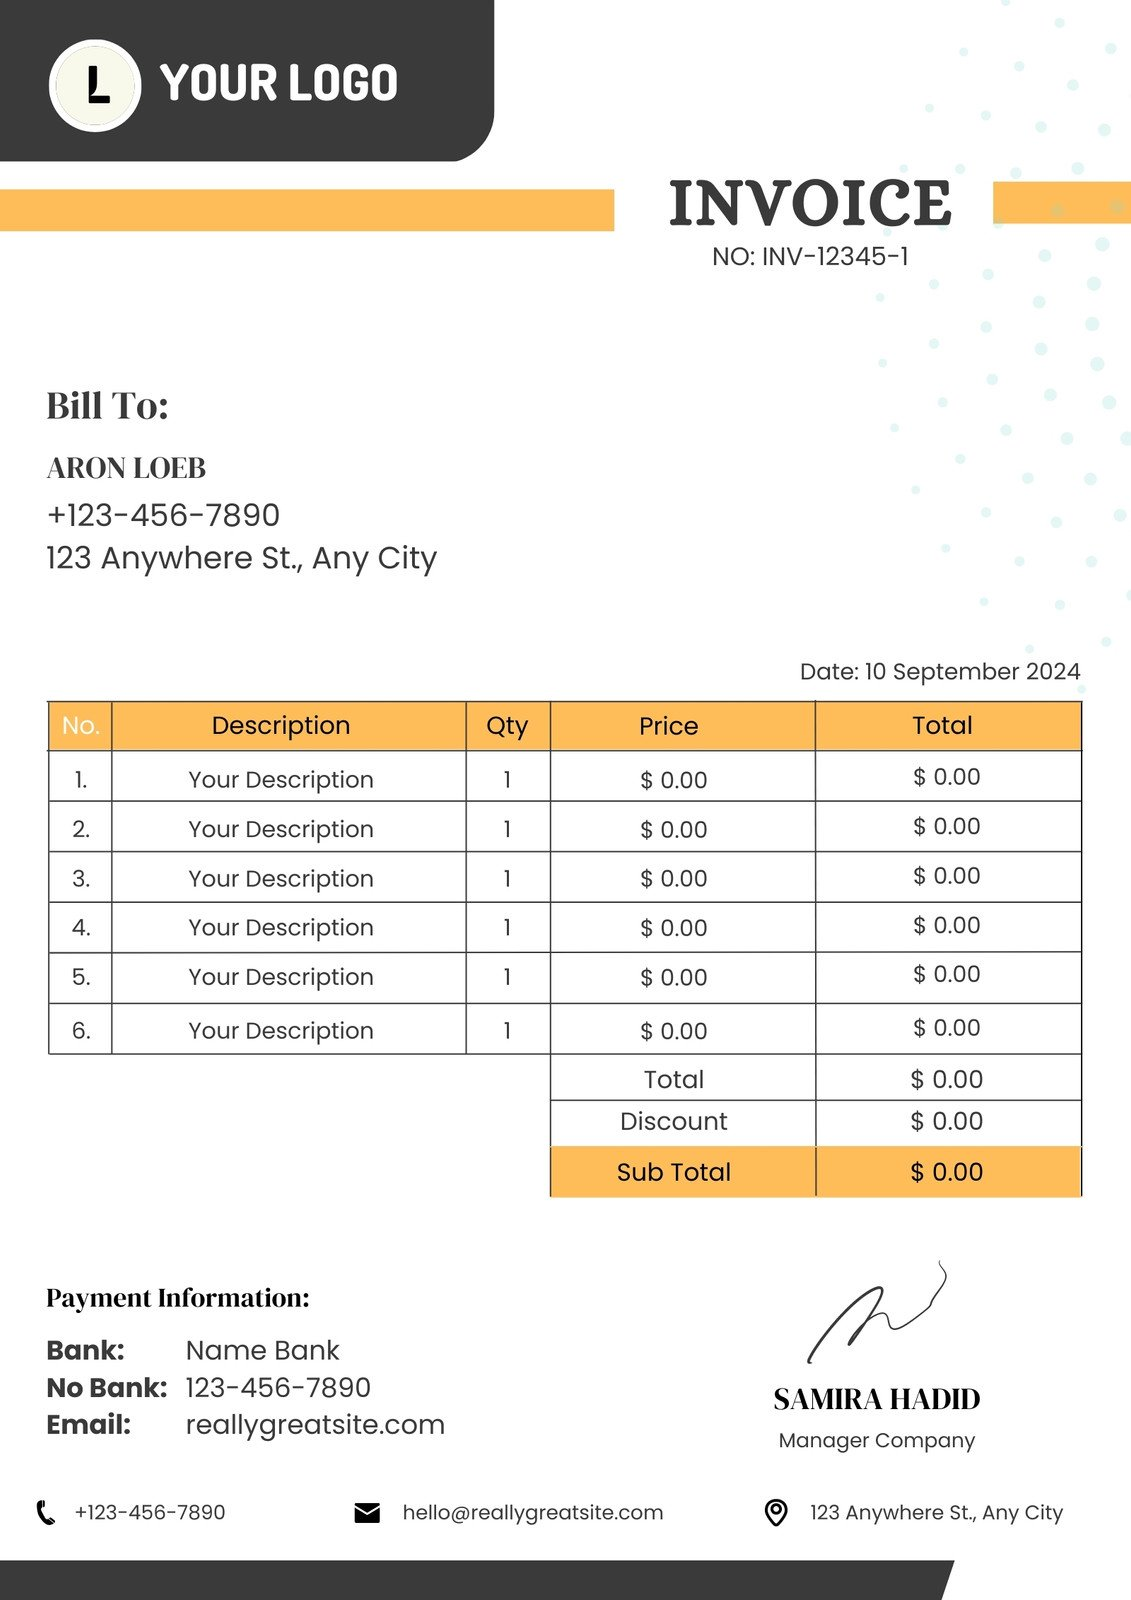

In [9]:
url = "https://marketplace.canva.com/EAFXqL8NfTQ/1/0/1131w/canva-black-%26-orange-a4-professional-invoice-ZAbveYe41E8.jpg"
image = Image.open(requests.get(url, stream=True).raw).convert("RGB")
image

In [13]:
images = [image]
placeholder = f"<|image_1|>\n"

In [14]:
messages = [
    {"role": "user", "content": placeholder+"Extract the manager signature."},
]

prompt = processor.tokenizer.apply_chat_template(
  messages,
  tokenize=False,
  add_generation_prompt=True
)

In [15]:
inputs = processor(prompt, images, return_tensors="pt").to("cuda:0")

generation_args = {
    "max_new_tokens": 100,
    "temperature": 0.0,
    "do_sample": False,
}

generate_ids = model.generate(**inputs,
  eos_token_id=processor.tokenizer.eos_token_id,
  **generation_args
)

# remove input tokens
generate_ids = generate_ids[:, inputs['input_ids'].shape[1]:]
response = processor.batch_decode(generate_ids,
  skip_special_tokens=True,
  clean_up_tokenization_spaces=False)[0]

print(response)

/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


The manager's signature is 'SAMIRA HADID'.


Chart and table understanding

In [16]:
messages = [
    {"role": "user", "content": placeholder+"What are the columns uesd in this table."},
]

prompt = processor.tokenizer.apply_chat_template(
  messages,
  tokenize=False,
  add_generation_prompt=True
)


inputs = processor(prompt, images, return_tensors="pt").to("cuda:0")

generation_args = {
    "max_new_tokens": 100,
    "temperature": 0.0,
    "do_sample": False,
}

generate_ids = model.generate(**inputs,
  eos_token_id=processor.tokenizer.eos_token_id,
  **generation_args
)

# remove input tokens
generate_ids = generate_ids[:, inputs['input_ids'].shape[1]:]
response = processor.batch_decode(generate_ids,
  skip_special_tokens=True,
  clean_up_tokenization_spaces=False)[0]

print(response)

The columns used in this table are 'No.', 'Description', 'Qty', 'Price', and 'Total'.


# Multi Frame

In [25]:
import os

images = []
placeholder = ""

folder_path = "/content/light-physics"

image_files = [img for img in os.listdir(folder_path) if img.endswith(('.png', '.jpg', '.jpeg'))]


for i,p in enumerate(image_files):
  image_path = os.path.join(folder_path, p)
  images.append(Image.open(image_path))
  placeholder += f"<|image_{i+1}|>\n"

In [26]:
messages = [
    {"role": "user", "content": placeholder+"Summarize those images."},
]

prompt = processor.tokenizer.apply_chat_template(
  messages,
  tokenize=False,
  add_generation_prompt=True
)

In [27]:
inputs = processor(prompt, images, return_tensors="pt").to("cuda:0")

generation_args = {
    "max_new_tokens": 500,
    "temperature": 0.0,
    "do_sample": False,
}

generate_ids = model.generate(**inputs,
  eos_token_id=processor.tokenizer.eos_token_id,
  **generation_args
)

# remove input tokens
generate_ids = generate_ids[:, inputs['input_ids'].shape[1]:]
response = processor.batch_decode(generate_ids,
  skip_special_tokens=True,
  clean_up_tokenization_spaces=False)[0]

print(response)

/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


In essence, the slides are organized into these parts:

- Optical Principles: 
The presentation explores the principles of optics, focusing on the behavior of light as it interacts with mirrors and glass. It uses diagrams to illustrate how light rays reflect off a concave mirror, creating a real image, and how they refract through a rectangular glass slab, resulting in a refracted ray. The diagrams also depict the formation of a virtual image in a convex mirror and the path of light rays from an object to a real image.
